In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/home/tavakol/uni/vision/image_name1.jpg',0)
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(img, 'gray')
plt.title('Original Image')

Text(0.5, 1.0, 'Original Image')

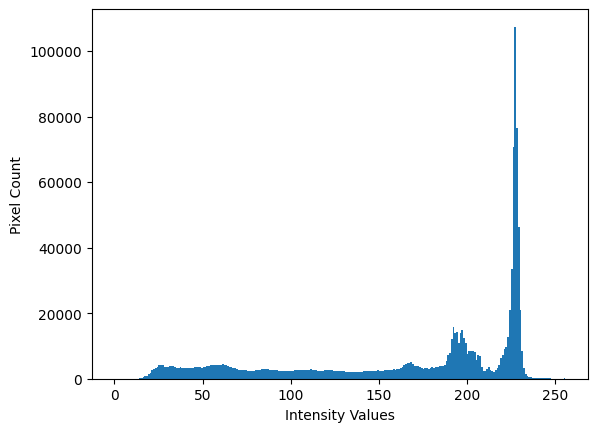

In [4]:
plt.hist(img.ravel(),256,[0,256])
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

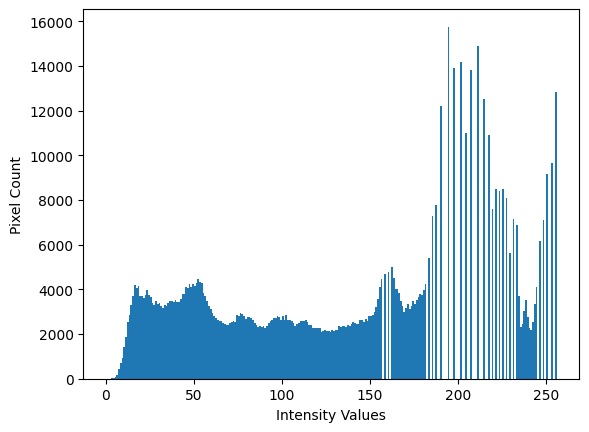

In [5]:
intensity_count = [0] * 256         

height,width = img.shape[:2]        
N = height * width                  

	#Array for new_image
high_contrast = np.zeros(img.shape) 

for i in range(0,height):
    		for j in range(0,width):
        			intensity_count[img[i][j]] += 1     #Find pixels count for each intensity

L = 256

intensity_count,total_values_used = np.histogram(img.flatten(),L,[0,L])      
pdf_list = np.ceil(intensity_count*(L-1)/img.size)                    #Calculate PDF
cdf_list = pdf_list.cumsum()                                            	#Calculate CDF


for y in range(0, height):
    		for x in range(0, width): 
			#Apply the new intensities in our new image
        			high_contrast[y,x] = cdf_list[img[y,x]]                         

plt.hist(high_contrast.ravel(),256,[0,256])	
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

Text(0.5, 1.0, 'High Contrast Image')

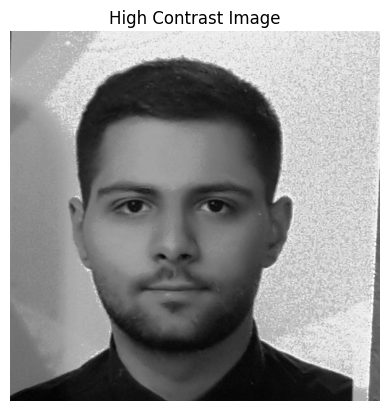

In [10]:
plt.axis("off")
plt.imshow(high_contrast, 'gray')
plt.title('High Contrast Image')